# Author - Prajwal S S Reddy

## THE SPARKS FOUNDATION GRIP

## Task-2 Prediction using Unsupervised ML

### Importing required libraries.

In [78]:
#import the required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploratory Data Analysis

#### Load the dataset

In [68]:
#loading the dataset 
iris_df = pd.read_csv("data/Iris.csv")
iris_df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [69]:
iris_df.drop(["Id","Species"],axis = 1,inplace=True)

In [70]:
iris_df.shape

(150, 4)

### Data Cleaning

In [71]:
#Checking for null values in iris dataset
iris_df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [72]:
#Droping duplicates in iris dataset
iris_df.drop_duplicates(inplace=True)
iris_df.shape

(147, 4)

### Finding optimum numbers of Clusters for Kmeans

In [73]:
from sklearn.cluster import KMeans

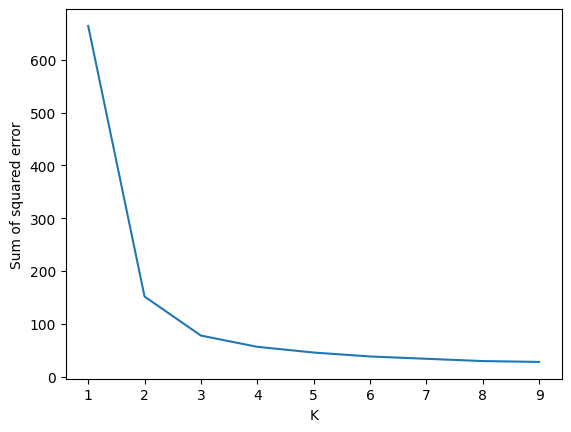

In [83]:
x = iris_df.iloc[:, 0:4].values
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### Applying K-means classifier

from above plot , i can choose k as 3

In [75]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(x)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

In [76]:
km.cluster_centers_

array([[5.01041667, 3.43125   , 1.4625    , 0.25      ],
       [5.90327869, 2.74918033, 4.38196721, 1.42622951],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

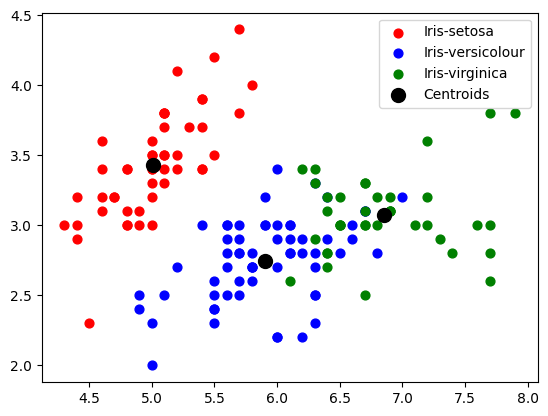

In [77]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1],s = 40, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1],s = 40, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1],s = 40, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.legend()